# Definir problema

In [386]:
#Importando as bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [387]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [388]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [389]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [390]:
df.shape

(205, 26)

In [391]:
df.info()
#All columns are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [392]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Vamos adicionar uma coluna com o nome dos modelos dos veículos:

In [393]:
for i in range(len(df.CarName)):
    df['Modelo'] = df.CarName.apply(lambda x: x.split(' ')[-1])

## Vamos adicionar uma coluna com o nome das montadoras do veículos:

In [394]:
df['Montadora'] = [0 for i in range(len(df))]
for i in range(len(df.CarName)):
    df.Montadora[i] = df.CarName.apply(lambda x: x.split(' '))[i][0]

<ipython-input-394-fe909f31295a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Henri\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [395]:
#Dropar a coluna 'CarName'
df.drop('CarName', axis = 1, inplace = True)

In [396]:
car_num = df.groupby('Montadora')['Montadora'].count().to_frame().rename({'Montadora':'Número de carros'}, axis = 1)

In [397]:
car_num.sort_values('Número de carros', ascending= False)

,Número de carros
Montadora,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
dodge,9


## Aqui vemos que existe uma série de entradas com o nome das montadoras escrito de forma errada. Vamos corrigir:

In [398]:
df.Montadora.replace({'toyouta':'toyota'}, inplace= True)
df.Montadora.replace({'porcshce': 'porsche'}, inplace = True)
df.Montadora.replace({'Nissan':'nissan'}, inplace = True)
df.Montadora.replace({'plymouth':'playmouth'}, inplace = True)
df.Montadora.replace({'alfa-romero': 'alfa-romeo'}, inplace = True)
df.Montadora.replace({'vokswagen':'volkswagen'}, inplace = True)

In [399]:
car_num = df.groupby('Montadora')['Montadora'].count().to_frame().rename({'Montadora':'Número de carros'}, axis = 1)

In [400]:
car_num

,Número de carros
Montadora,
alfa-romeo,3
audi,7
bmw,8
buick,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3


In [401]:
#Nomes das montadoras, corrigido.
df.Montadora.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'playmouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'],
      dtype=object)

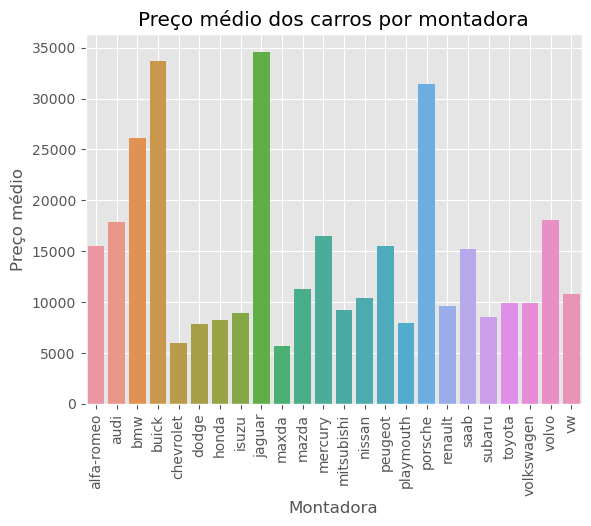

In [402]:
sns.barplot(x = df.groupby('Montadora')['price'].mean().to_frame().index, y = df.groupby('Montadora')['price'].mean().to_frame()['price'] )
plt.style.use('ggplot')
plt.grid(True)
plt.ylabel('Preço médio')
plt.xticks(rotation = 90)
plt.title('Preço médio dos carros por montadora')
plt.show()

## Vamos verificar as correlações

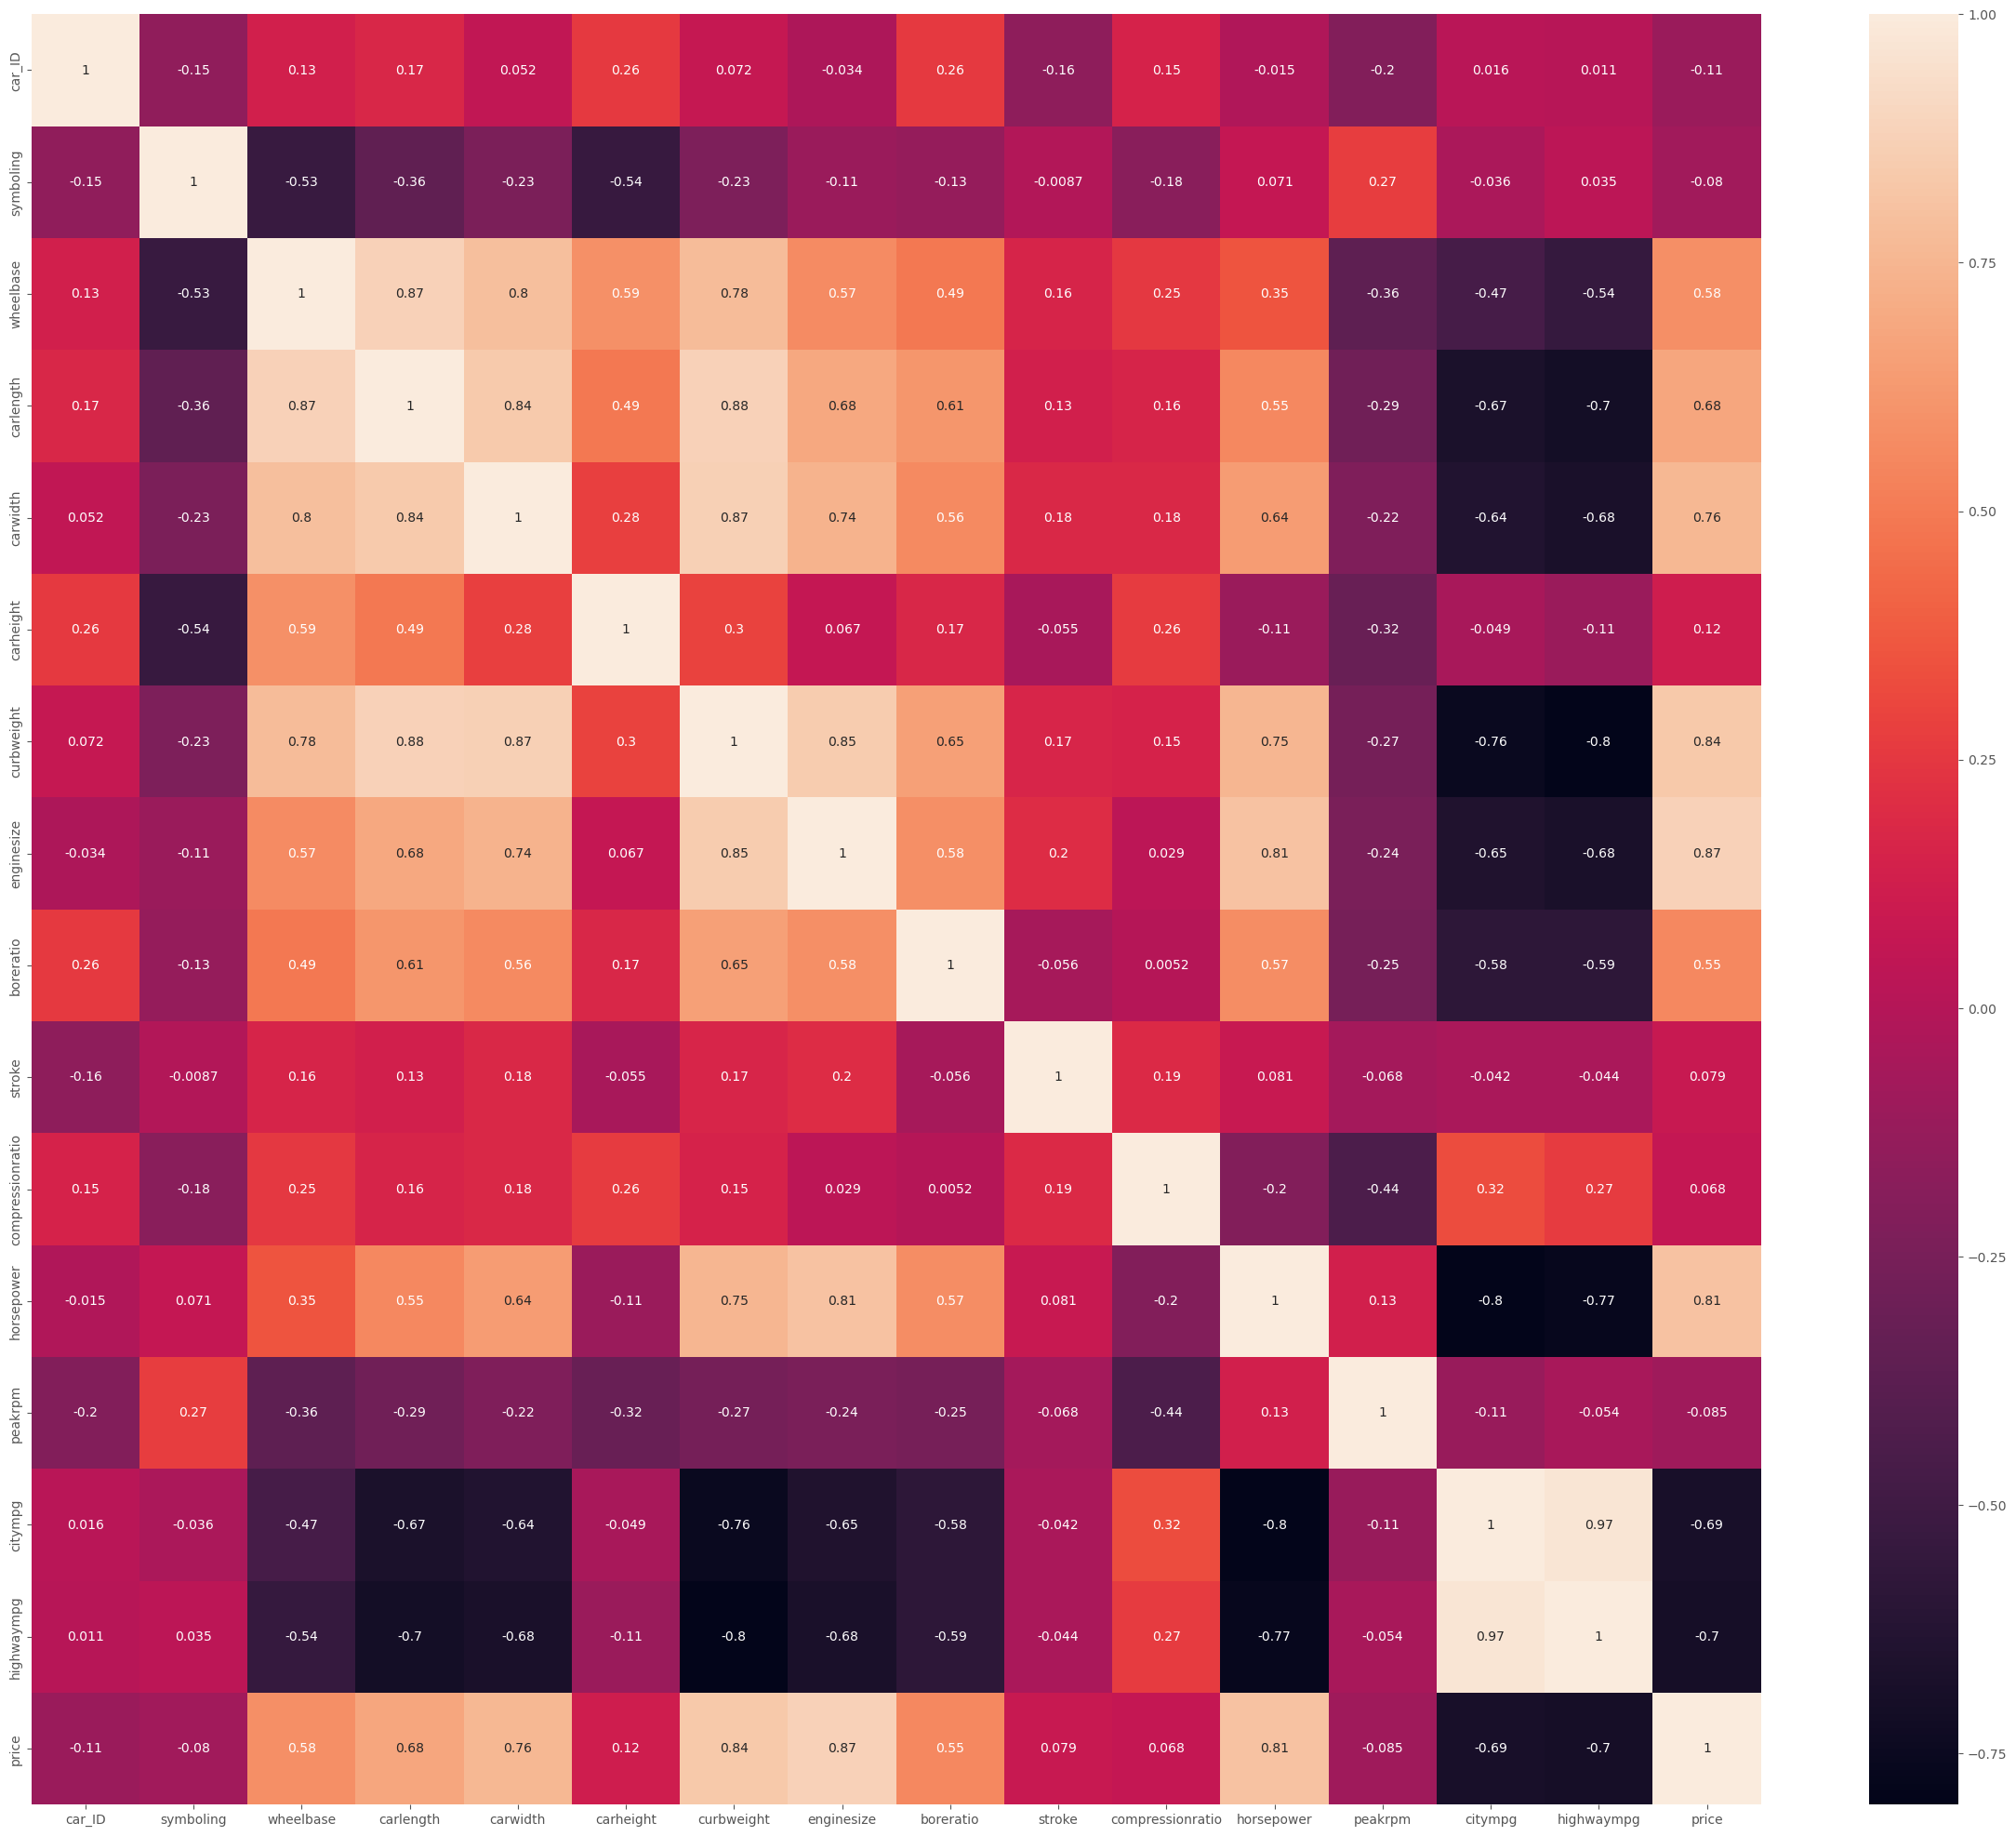

In [403]:
dfcorr = df.corr()
plt.figure(figsize = (30, 25))
sns.heatmap(dfcorr, annot = True)
plt.show()

## Vamos ver os atributos mais correlacionados com o preço. **Essa é uma técnica interessante, que vale a pena o destaque:**

In [404]:
df.corr().price.nlargest(6)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
Name: price, dtype: float64

In [405]:
cols = df.corr().price.nlargest(6).to_frame().index.drop('price')
cols = list(cols)
cols

['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength']

In [406]:
colsp = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'price']

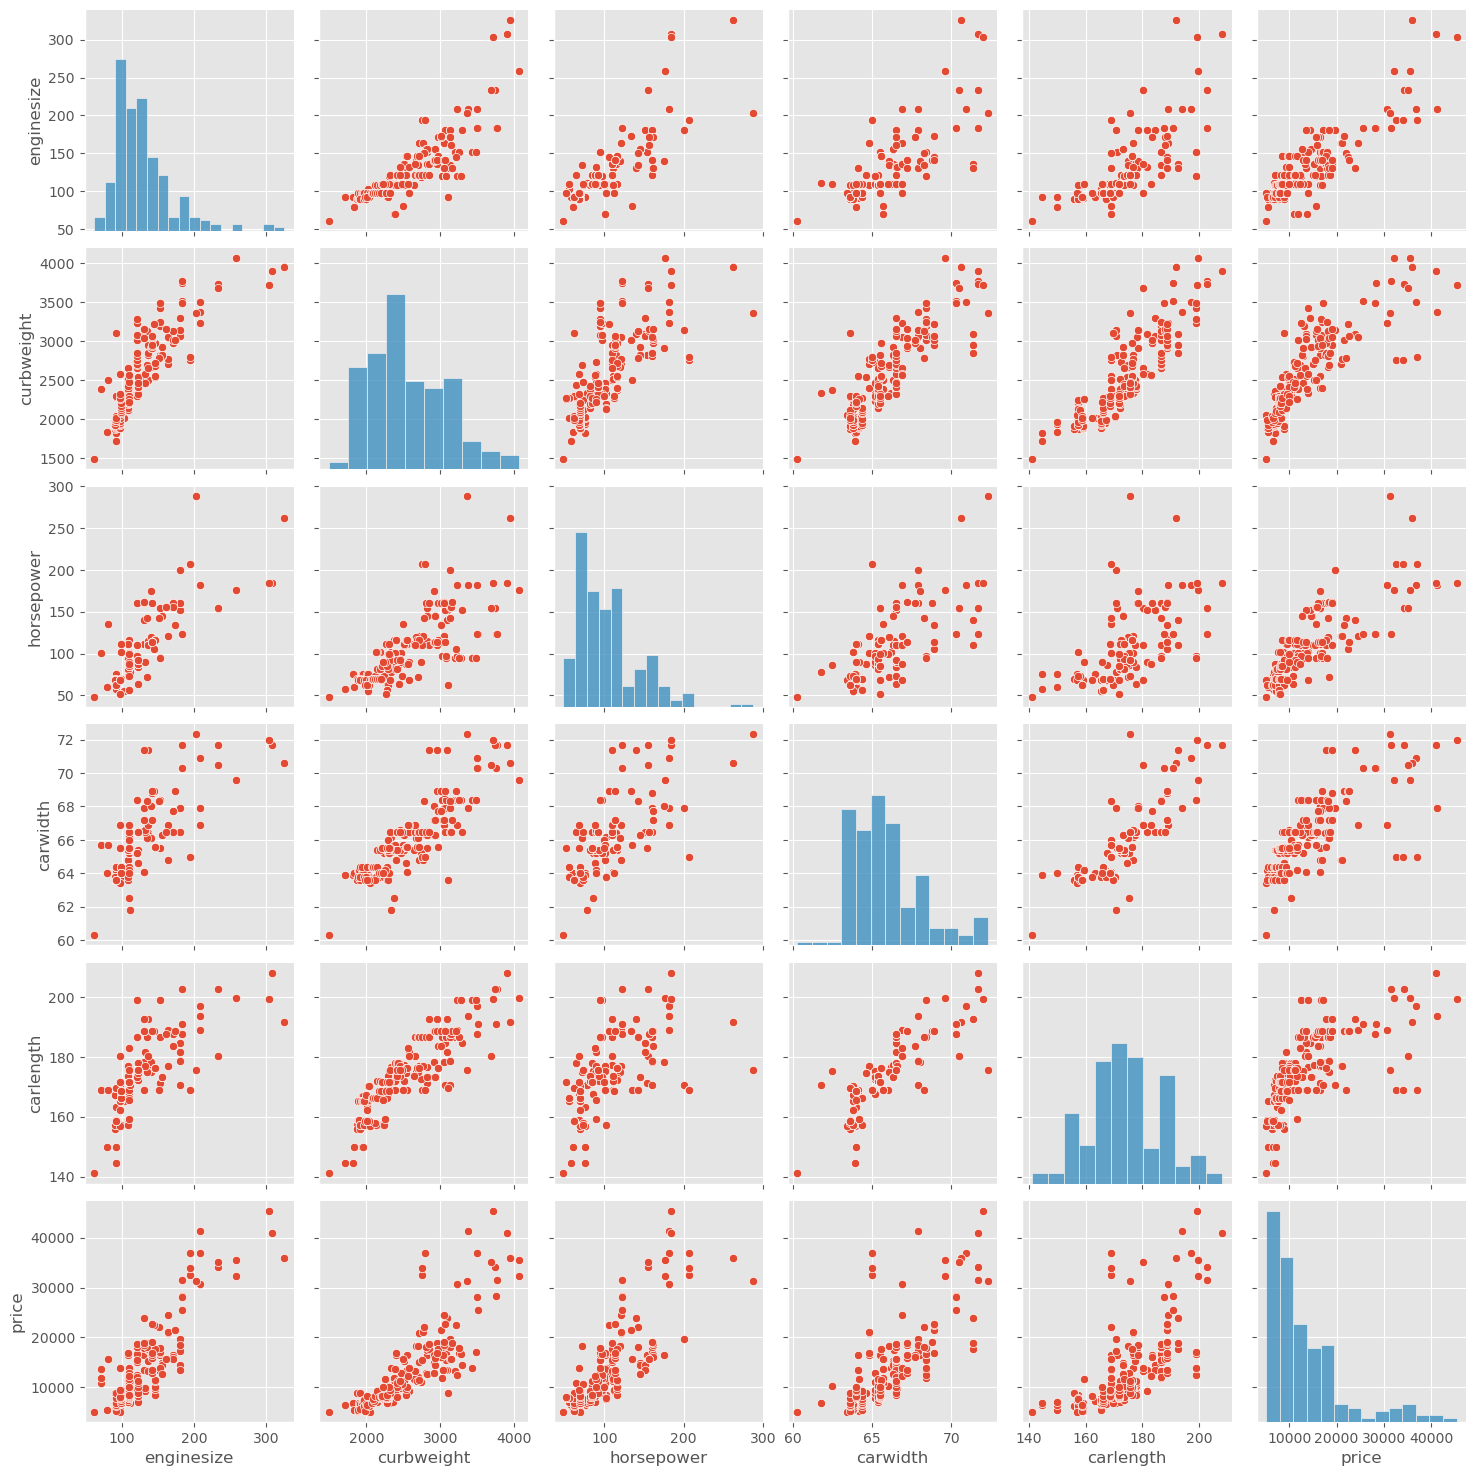

In [407]:
sns.pairplot(data = df[colsp])
plt.show()

### Vamos visualizar a relação de algumas variáveis qualitativas interessantes e associar à lista 'cols1':

In [408]:
cols1 = ['enginelocation', 'cylindernumber', 'fuelsystem', 'drivewheel']

In [409]:
def plot1(x, fig):
    plt.figure(figsize=(10,80))
    plt.subplot(10,1, (fig+1))
    plt.title(x + ' Histogram')
    sns.countplot(df[x], palette = ('crest'))
    plt.subplot(10,1,(fig+2))
    plt.title(x + ' x Preço')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    plt.show()

C:\Users\Henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



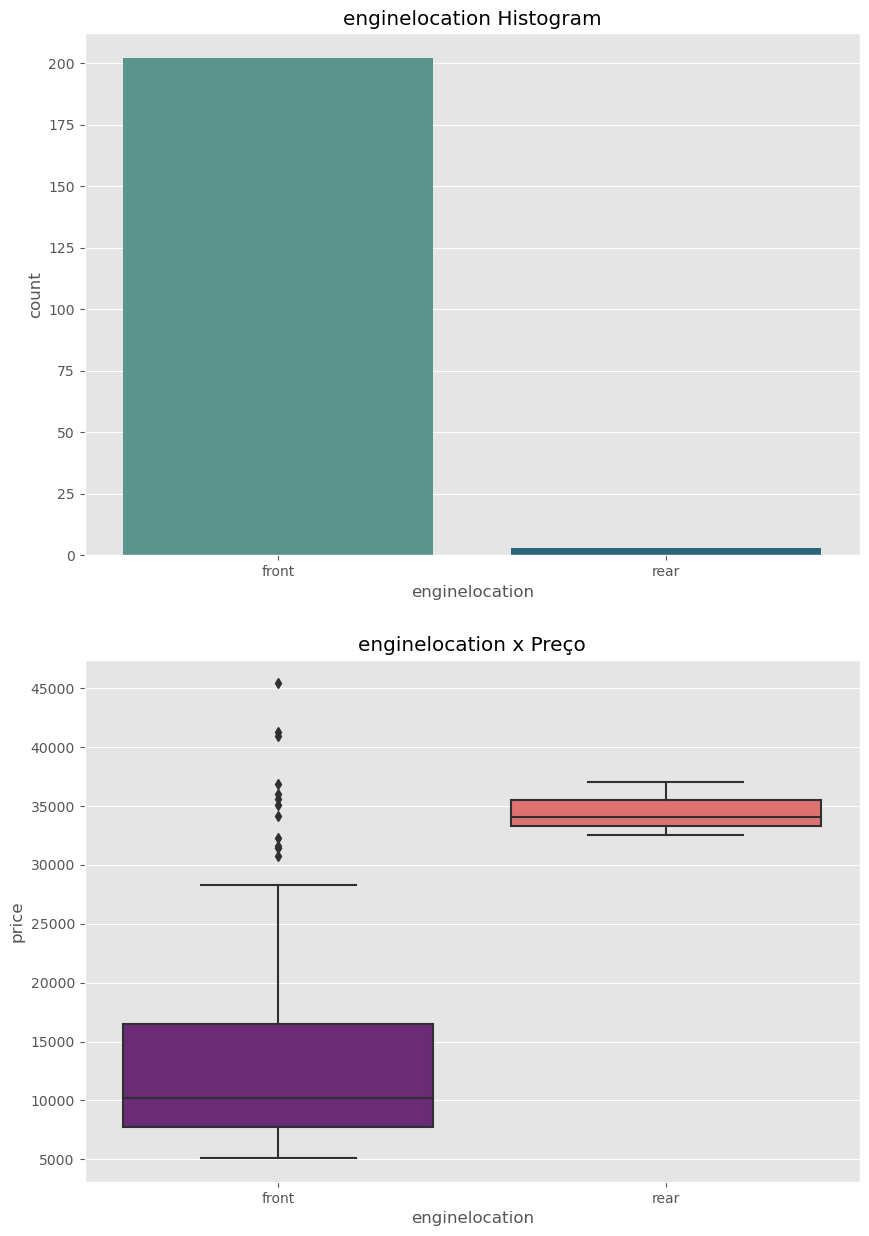

C:\Users\Henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



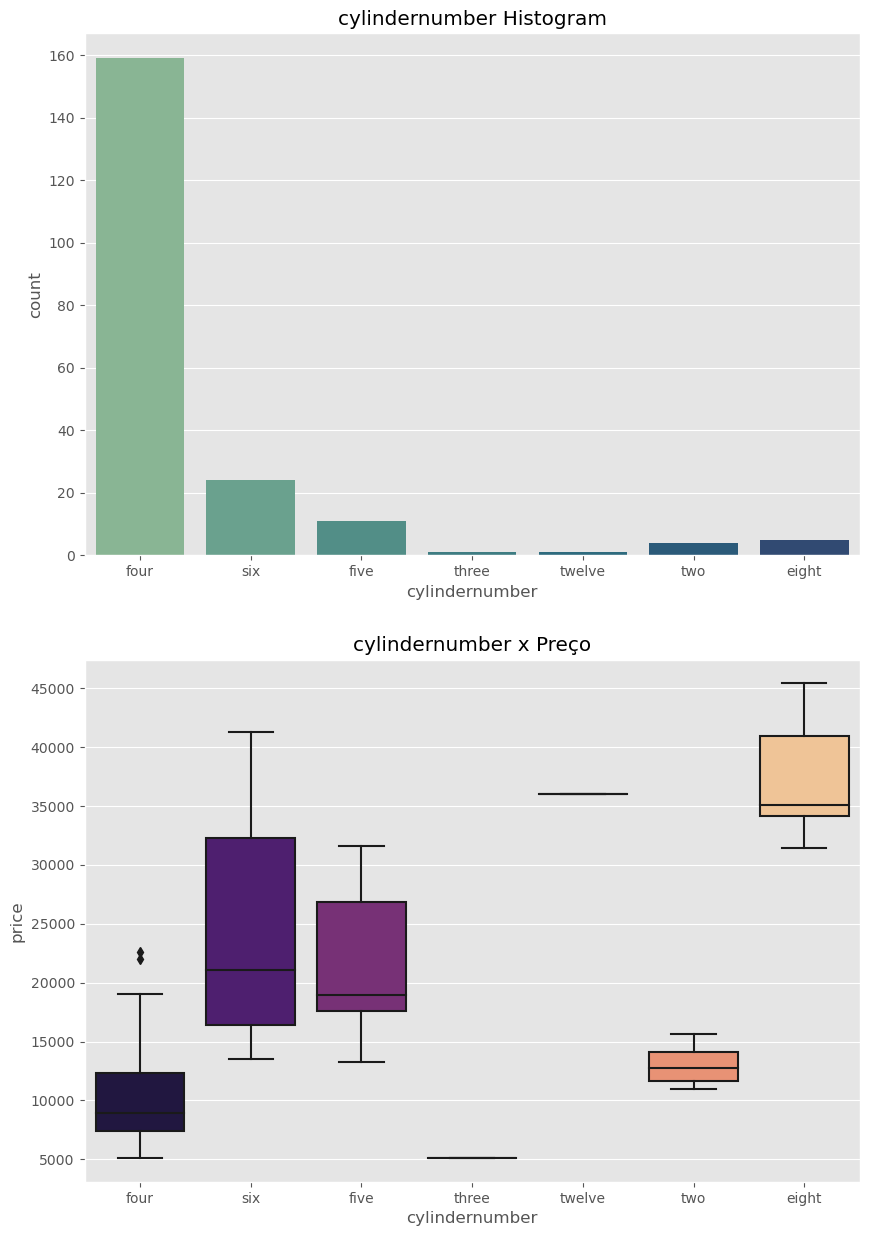

C:\Users\Henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



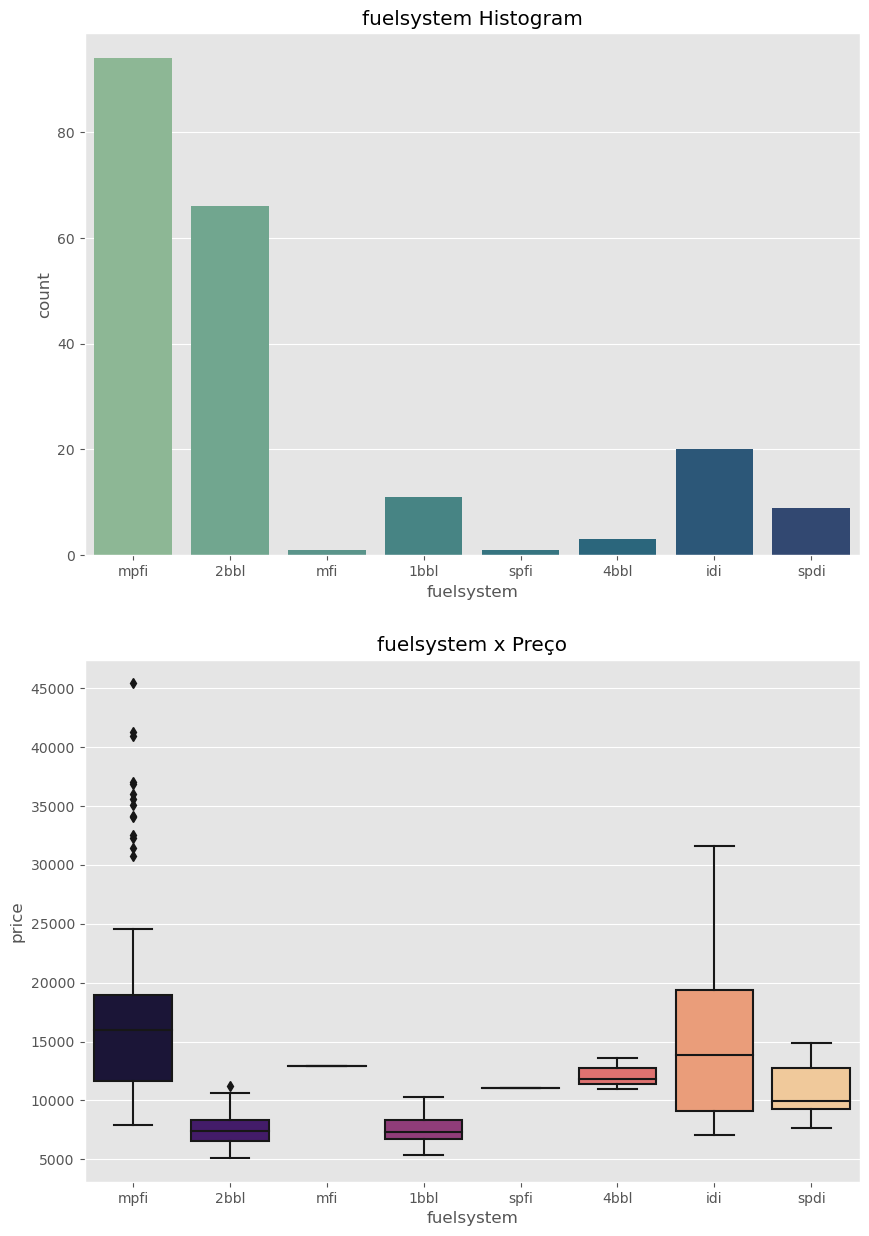

C:\Users\Henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



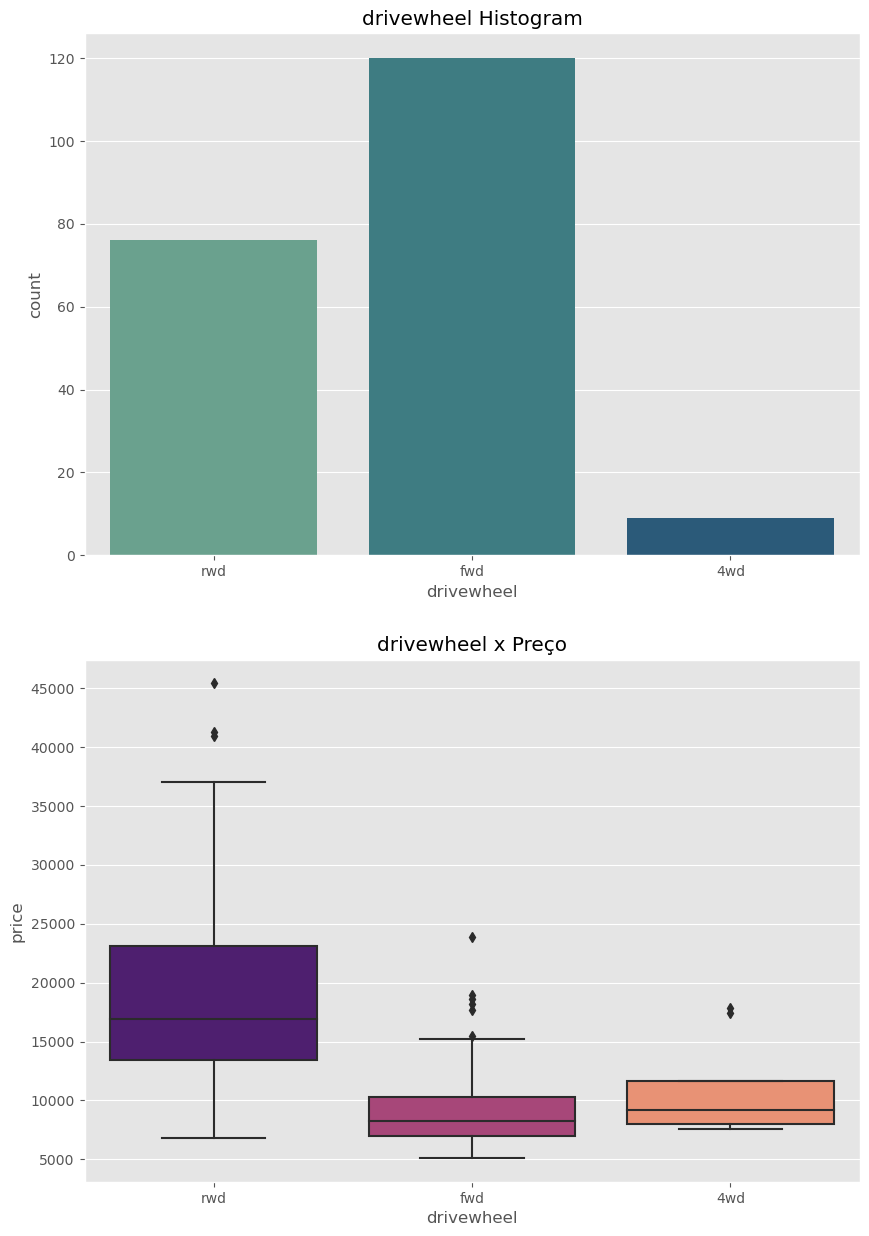

In [410]:
for i,x in enumerate(cols1):
    plot1(x, i)

## Agora vamos avaliar as variáveis quantitativas da lista 'cols':

In [411]:
def plot2(x, fig):
    plt.figure(figsize = (10,10))
    plt.subplot(3,2, (fig+2))
    plt.title('Regplot of ' + x)
    sns.color_palette("viridis", as_cmap=True)
    sns.regplot(x = x, y = df['price'], data = df, scatter_kws={"color": "black"}, line_kws={"color": "cyan"})
  
    plt.show()

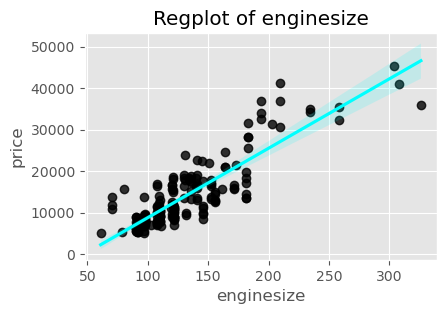

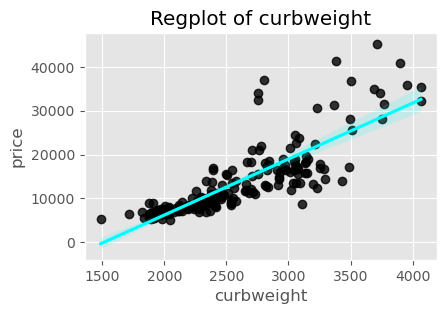

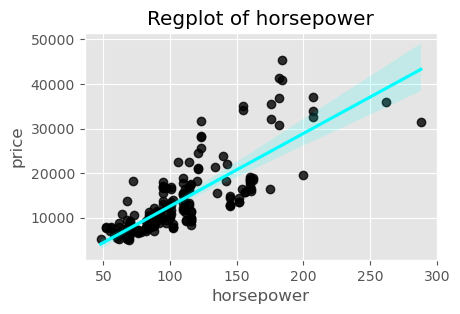

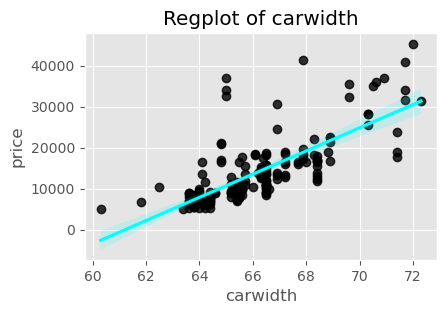

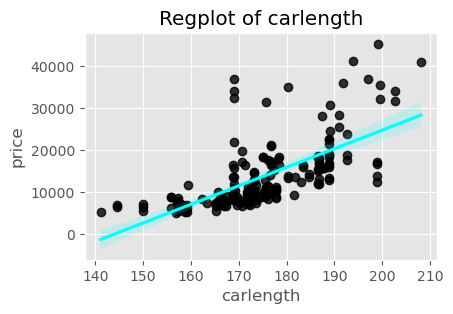

In [412]:
for i,x in enumerate(cols):
    plot2(x,i)



# Aqui iniciaremos as análises das regressões;

In [413]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [414]:
x = df.drop(['price', 'Modelo', 'car_ID'], axis = 1)
y = df['price']

In [415]:
x.iloc[:,2]
x.loc[:,'Montadora']
x.loc[:, 'fueltype']
x.loc[:, 'aspiration']
x.loc[:, 'doornumber']
x.loc[:, 'carbody']
x.loc[:, 'drivewheel']
x.loc[:, 'enginelocation']

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: enginelocation, Length: 205, dtype: object

In [416]:
le = LabelEncoder()

x.iloc[:,2] = le.fit_transform(x.iloc[:,2])
x.loc[:,'Montadora'] = le.fit_transform(x.loc[:,'Montadora'])
x.loc[:, 'fueltype'] = le.fit_transform(x.loc[:, 'fueltype'])
x.loc[:, 'aspiration'] = le.fit_transform(x.loc[:, 'aspiration'])
x.loc[:, 'doornumber'] = le.fit_transform(x.loc[:, 'doornumber'])
x.loc[:, 'carbody'] = le.fit_transform(x.loc[:, 'carbody'])
x.loc[:, 'drivewheel'] = le.fit_transform(x.loc[:, 'drivewheel'])
x.loc[:, 'enginelocation'] = le.fit_transform(x.loc[:, 'enginelocation'])
x.loc[:, 'enginetype'] = le.fit_transform(x.loc[:, 'enginetype'])
x.loc[:, 'cylindernumber'] = le.fit_transform(x.loc[:, 'cylindernumber'])
x.loc[:, 'fuelsystem'] = le.fit_transform(x.loc[:, 'fuelsystem'])

In [417]:
x.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'Montadora'],
      dtype='object')

In [418]:
mm = MinMaxScaler()
x_new = mm.fit_transform(x)

In [419]:
x_new

array([[1.        , 1.        , 0.        , ..., 0.22222222, 0.28947368,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.22222222, 0.28947368,
        0.        ],
       [0.6       , 1.        , 0.        , ..., 0.16666667, 0.26315789,
        0.        ],
       ...,
       [0.2       , 1.        , 0.        , ..., 0.13888889, 0.18421053,
        0.95652174],
       [0.2       , 0.        , 1.        , ..., 0.36111111, 0.28947368,
        0.95652174],
       [0.2       , 1.        , 1.        , ..., 0.16666667, 0.23684211,
        0.95652174]])

In [420]:
freg = SelectKBest(score_func=f_regression, k= 10)

In [421]:
freg.fit(x_new, y)

SelectKBest(score_func=<function f_regression at 0x00000161DB24A310>)

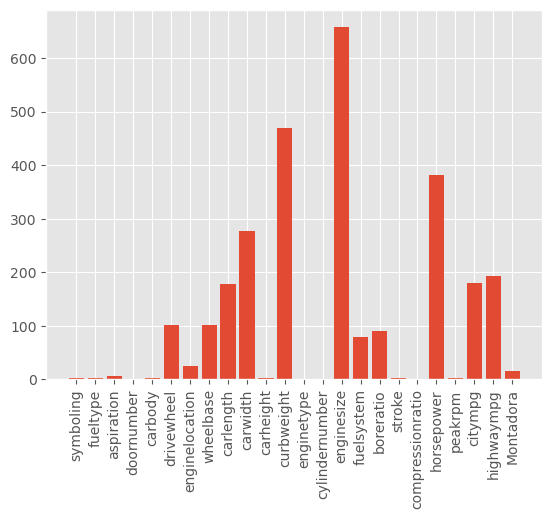

In [422]:
plt.bar(x.columns, freg.scores_)
plt.xticks(rotation = 90)
plt.show()

In [423]:
X = x.loc[:, freg.scores_ > 200]
X

,carwidth,curbweight,enginesize,horsepower
0,64.1,2548,130,111
1,64.1,2548,130,111
2,65.5,2823,152,154
3,66.2,2337,109,102
4,66.4,2824,136,115
...,...,...,...,...
200,68.9,2952,141,114
201,68.8,3049,141,160
202,68.9,3012,173,134
203,68.9,3217,145,106


In [424]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [428]:
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)

In [429]:
pred = model.predict(xtest)

In [430]:
r2_score(ytest, pred)

0.8201488907707806

In [431]:
MAE(ytest, pred)

2267.5086926521053

In [432]:
#Média das razões entre os valores do que foi previsto e os valores reais
(pred/ytest).mean()

0.9852544890563522

In [433]:
model

LinearRegression()

In [434]:
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingRegressor

In [435]:
classifiers = [('lr', model), ('rf', model2)]
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=10, random_state=1)
model3 = VotingRegressor(classifiers)


In [436]:
models = {model1:'LinearRegression', model2:'RandomForest', model3:'VotingRegressor'}

In [437]:
list(models.values())

['LinearRegression', 'RandomForest', 'VotingRegressor']

In [438]:
for model in models:
    _ = model.fit(xtrain, ytrain)
    pred = _.predict(xtest)
    print(f'The R2 score of the {model} is:',r2_score(pred, ytest))
    

The R2 score of the LinearRegression() is: 0.8019521664330095
The R2 score of the RandomForestRegressor(n_estimators=10, random_state=1) is: 0.8881338915874969
The R2 score of the VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))]) is: 0.889312024475577


## O RandomForestRegressor foi o que gerou o melhor ajuste, será que podemos melhorar?


In [439]:
lista_r2 = []
for i in range(100):
    rfr = RandomForestRegressor(n_estimators=i+1)
    rf_model = rfr.fit(xtrain, ytrain)
    pred = rf_model.predict(xtest)
    r_2 = r2_score(ytest, pred)
    lista_r2.append(r_2)
    

In [440]:
import plotly.express as px
fig = px.line(x = range(len(lista_r2)), y = lista_r2, markers=True)
fig.update_layout(title='N-Estimators x R2 score',
                   xaxis_title='N-Estimators',
                   yaxis_title='R2 score')
fig.add_annotation(x = lista_r2.index(max(lista_r2)), y = max(lista_r2), text = 'Valor máximo')
fig.show()


In [444]:
#Valor máximo do R2 score:
max(lista_r2)

0.9304415896266782

In [446]:
#Valor do melhor 'n' encontrado:
lista_r2.index(max(lista_r2))

24

In [480]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [482]:
lm = LinearRegression()
lm.fit(xtrain, ytrain)
rfe = RFE(lm, 10)
rfe = rfe.fit(xtrain, ytrain)

C:\Users\Henri\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



In [483]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [484]:
X_train_new = build_model(xtrain, ytrain)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     152.7
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.20e-49
Time:                        16:38:58   Log-Likelihood:                -1373.1
No. Observations:                 143   AIC:                             2756.
Df Residuals:                     138   BIC:                             2771.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.351e+04   1.63e+04     -2.059      0.0

C:\Users\Henri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

